In [35]:
import pandas as pd
%matplotlib inline

# First Dataset  - Trends in Imprisonement in Texas

In [74]:
##All monthly reports submitted by the Safe Prisons/PREA Management Office staff to the Correctional 
##Institutions Division directors since Jan. 1, 2016. 
##These reports analyze and evaluate trends in sexual abuse, sexual harassment

In [75]:
Imprisonement = pd.read_excel('tabula-Safe Prisons Program Management Office.xls', skiprows=1)

### Region I - Alleged Sexual Assault Criminal Cases Opened by OIG"

In [76]:
Imprisonement.head()

,Unnamed: 0,Unnamed: 1,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Apr,May,Jun,July,Aug,FY Total
0,NaN,Byrd,0,0,0,0,0,0,0,1,0,0,0,0,1
1,NaN,Duncan,0,0,0,0,0,1,0,0,0,0,0,0,1
2,NaN,Eastham,0,0,0,0,1,2,1,0,0,0,0,0,4
3,NaN,Ellis,0,0,1,1,0,0,0,0,0,0,1,0,3
4,NaN,Estelle,0,3,2,1,1,1,2,0,0,0,3,0,13


In [77]:
del Imprisonement['Unnamed: 0']

In [78]:
Imprisonement = Imprisonement.rename(columns={'Unnamed: 1': 'Region'})

In [79]:
Imprisonement.head()

,Region,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Apr,May,Jun,July,Aug,FY Total
0,Byrd,0,0,0,0,0,0,0,1,0,0,0,0,1
1,Duncan,0,0,0,0,0,1,0,0,0,0,0,0,1
2,Eastham,0,0,0,0,1,2,1,0,0,0,0,0,4
3,Ellis,0,0,1,1,0,0,0,0,0,0,1,0,3
4,Estelle,0,3,2,1,1,1,2,0,0,0,3,0,13


In [80]:
Imprisonement['Sep'].value_counts()

0    12
1     2
Name: Sep, dtype: int64

In [81]:
Imprisonement.groupby('FY Total')['Region'].value_counts()

FY Total  Region    
0         Goodman       1
          Goree         1
1         Byrd          1
          Duncan        1
          Holliday      1
          Huntsville    1
          Polunsky      1
3         Ellis         1
4         Eastham       1
          Wynne         1
12        Lewis         1
13        Estelle       1
          Ferguson      1
54        Totals        1
Name: Region, dtype: int64

# Second Dataset - Bicycle Accidents

In [82]:
##https://www.muckrock.com/foi/chicago-169/bike-tickets-arrest-38464/

In [103]:
Accidents_bicycle = pd.read_csv('tabula-Bycicle_accidents.csv')

In [104]:
Accidents_bicycle.head()

,ANOV Issue Date,Street No,Street Direction,Street Name,ANOV Number,Violation Description,Age
0,9-Jun-12,23XX,N,MANGO,P003284926,9-52-020 Riding bicycles on sidewalks and c...,24.0
1,9-Jun-12,27XX,W,CERMAK,P003043958,9-52-020 Riding bicycles on sidewalks and c...,28.0
2,9-Jun-12,34XX,W,BEACH ST,P003227315,9-52-020 Riding bicycles on sidewalks and c...,28.0
3,9-Jun-12,61XX,N,SHERIDAN,P003133404,9-52-020 Riding bicycles on sidewalks and c...,34.0
4,9-Jun-12,61XX,N,SHERIDAN,P003133953,9-52-020 Riding bicycles on sidewalks and c...,28.0


In [105]:
Accidents_bicycle['Age'].mean()

28.608247422680414

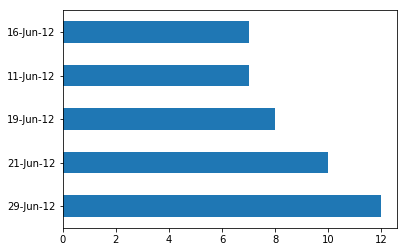

In [106]:
Accidents_bicycle['ANOV Issue Date'].value_counts(ascending=False).head().plot(kind='barh')

In [91]:
Accidents_bicycle['Violation Description'].str.contains('sidewalk').value_counts()

True     72
False    26
Name: Violation Description, dtype: int64

In [92]:
Accidents_bicycle['Street Name'].value_counts().head()

MICHIGAN       7
79TH ST        3
DIVISION       2
SHERIDAN RD    2
KINZIE ST      2
Name: Street Name, dtype: int64

In [107]:
Accidents_bicycle['Violation Description'].value_counts()

9-52-020    Riding bicycles on sidewalks and certain roadway    72
9-52-010    Rights and duties.                                  17
9-52-080    Headlamps                                            8
9-52-060    Carrying articles on bicycles.                       1
Name: Violation Description, dtype: int64

# Third Dataset: Violations through firearmes



In [102]:
#original source had to be cleaned: https://cdn.muckrock.com/foia_files/2017/04/20/FIREARM_CRIMES.txt
#https://www.muckrock.com/foi/martin-county-10447/gun-policies-incidents-martin-county-fl-33677/

In [55]:
headers = ['CALL#...  ','DATE....  ','TIME.  ','Call Type...........  ','CASE#...  ','LOCATION............']

In [56]:
for item in headers:
    print(len(item))

10
10
7
22
10
20


In [70]:
widths = [
    10, #CALL
    10, #DATE
    7, #TIME
    22, #CALL TYPE
    10, #CASE
    20, #LOCATION
]
Shootings = pd.read_fwf("FIREARM_CRIMES.txt", widths=widths)
Shootings.head()

,CALL#...,DATE....,TIME.,Call Type...........,CASE#...,LOCATION............
0,15000011,01/01/15,00:13,SHOOTING IN AREA,NaN,SW 83RD ST/SW CITRUS
1,15000823,01/02/15,03:13,ASSAULT,NaN,5091 SE KINGFISH AV
2,15001378,01/02/15,19:16,SHOOTING IN AREA,NaN,3792 NE OCEAN BL; GR
3,15001454,01/02/15,21:50,SHOOTING IN AREA,NaN,3252 SW MAJESTIC CT
4,15002157,01/03/15,19:43,SHOOTING IN AREA,NaN,10400 SW STONES THRO


In [62]:
Shootings['Call Type...........'].value_counts()

SHOOTING IN AREA    157
ASSAULT              98
ARMED/DANGEROUS      74
SHOOTING             24
ARMED ROBBERY        14
Name: Call Type..........., dtype: int64

In [67]:
Shootings.groupby('TIME.')['Call Type...........'].value_counts().head()

TIME.  Call Type...........
00:08  SHOOTING IN AREA        1
00:13  SHOOTING IN AREA        1
00:17  SHOOTING IN AREA        2
00:37  ARMED/DANGEROUS         1
       SHOOTING IN AREA        1
Name: Call Type..........., dtype: int64

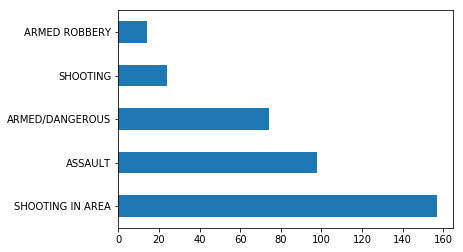

In [95]:
Shootings['Call Type...........'].value_counts().plot(kind='barh')